<a href="https://colab.research.google.com/github/arthurpeter/Machine_Learning/blob/main/Lab_01_Neural_Networks_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 - Introduction to PyTorch

Additional Resources for learning about PyTorch and working with neural networks:
- [PyTorch official tutorials](https://pytorch.org/tutorials/)
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [Neural Networks: Zero to Hero by Andrej Karpathy](https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)
- [Learn PyTorch for deep learning in a day by Daniel Bourke](https://www.youtube.com/watch?v=Z_ikDlimN6A)

The purpose of this lab is to offer a short introduction to the PyTorch library and to help you construct and train a neural network.

You should be familiar with numpy basics. Here is a short [tutorial](https://numpy.org/devdocs/user/quickstart.html) on numpy operations.

We import the necessary libraries.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

### Tensors

PyTorch Tensors are similar to Numpy arrays, but have support for GPU acceleration and gradient computation.

A tensor is a generalization of data structures that you are familiar with.

For example a vector is a 1D tensor, and a matrix is a 2D tensor. Most operations with torch tensors are similar to those of Numpy arrays.

#### Initialization

Creating an empty tensor

In [4]:
a = torch.tensor([])
print(a)

tensor([])


Creating a tensor with specific size

In [5]:
b = torch.empty((3, 4))  # Creates a tensor of size 3x4 filled with uninitialized values
print(b)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 7.7052e+31, 7.2148e+22],
        [1.5766e-19, 1.0256e-08, 6.4456e-10, 3.0957e+12]])


Creating a tensor from a list

In [6]:
c = torch.tensor([[1, 2], [3, 4]])
print(c)

tensor([[1, 2],
        [3, 4]])


Converting a NumPy array to a tensor

In [7]:
array_data = np.array([1, 2, 3, 4, 5])
d = torch.from_numpy(array_data)
print(d)

tensor([1, 2, 3, 4, 5])


Creating a tensor with random values between 0 and 1 with specific shape

In [8]:
e = torch.rand(2, 2) * 100
print(e)

tensor([[37.4397, 83.4720],
        [22.5773, 60.8909]])


#### Shape of tensor

The dimensions of a tensor can be checked with `.shape` attribute or `.size()` function.

In [9]:
x = torch.rand(5,3,2)

shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

print(x)

Shape: torch.Size([5, 3, 2])
Size: torch.Size([5, 3, 2])
Size: 5 3 2
tensor([[[0.9715, 0.7015],
         [0.9933, 0.3218],
         [0.9986, 0.7039]],

        [[0.0526, 0.8329],
         [0.6842, 0.3299],
         [0.9910, 0.7248]],

        [[0.0282, 0.8774],
         [0.4074, 0.9494],
         [0.0338, 0.8680]],

        [[0.3678, 0.4801],
         [0.2708, 0.8870],
         [0.0527, 0.7854]],

        [[0.2472, 0.6880],
         [0.2294, 0.4490],
         [0.2136, 0.8597]]])


#### Operations with tensors

Tensors support most mathematical operations, similar to numpy arrays

Addition

In [10]:
a = torch.tensor([[1,2], [3,4], [5,6]])
b = torch.rand(3,2)

c = a + b

print("a", a)
print("b", b)
print("c", c)

a tensor([[1, 2],
        [3, 4],
        [5, 6]])
b tensor([[0.8106, 0.8891],
        [0.4191, 0.5668],
        [0.4917, 0.4611]])
c tensor([[1.8106, 2.8891],
        [3.4191, 4.5668],
        [5.4917, 6.4611]])


Elementwise Multiplication

In [11]:
d = a * b
print(d)

tensor([[0.8106, 1.7782],
        [1.2572, 2.2673],
        [2.4587, 2.7667]])


Changing shape of tensor

Always check the shape of the tensors when performing complex operations. It's very useful for debugging.

In [12]:
e = torch.arange(6)
print("Before:")
print("Shape", e.shape)
print("Tensor", e)
print("-" * 30)

# Changing shape operation
e = e.view(2,3)

print("After:")
print("Shape", e.shape)
print("Tensor", e)

Before:
Shape torch.Size([6])
Tensor tensor([0, 1, 2, 3, 4, 5])
------------------------------
After:
Shape torch.Size([2, 3])
Tensor tensor([[0, 1, 2],
        [3, 4, 5]])


Matrix Multiplication

In [13]:
print(a.shape)
print(e.shape)

# 3x2 matrix multiplied with 2x3 matrix should result in a 3x3 matrix

f = torch.matmul(a,e)

print(f.shape)
print(f)

torch.Size([3, 2])
torch.Size([2, 3])
torch.Size([3, 3])
tensor([[ 6,  9, 12],
        [12, 19, 26],
        [18, 29, 40]])


Indexing

First we create a 2x2x4 tensor to see how we can access different parts of the tensor

In [14]:
x = torch.arange(16)
x = x.view(2, 2, 4)
print(x)
print(x.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]])
torch.Size([2, 2, 4])


What does shape (2, 2, 4) mean exactly?

We have:
- 2 elements along the first dimension - 2 2D matrices;
- 2 elements along the second dimension - 2 rows for each matrix;
- 4 elements along the third dimension - 4 columns.


In [15]:
# Selecting the first element from the first dimension -> the first 2D matrix
print(x[0])

# ':' operator means select all elements from this dimension

# Selecting all elements that have index 0 in second dimension -> first row of each 2D matrix
print(x[:, 0])

# Selecting all elements that have index 0 in third dimension -> all elements from first column
print(x[:,:,0])

# Selecting all elements that have index between 1 and 3 (excluding 3) in third dimension -> 2nd and 3rd column
print(x[:,:,1:3])

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])
tensor([[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]])
tensor([[ 0,  4],
        [ 8, 12]])
tensor([[[ 1,  2],
         [ 5,  6]],

        [[ 9, 10],
         [13, 14]]])


Play with the indexing operations to get a more intuitive understanding of what they do.

For the following tensor try to obtain this result with indexing:

```
tensor([[[ 6,  7],
         [10, 11]],

        [[22, 23],
         [26, 27]]])
```

In [16]:
x = torch.arange(64).view(4, 4, 4)
print(x)

# Use indexing the obtain the desired tensor

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]],

        [[32, 33, 34, 35],
         [36, 37, 38, 39],
         [40, 41, 42, 43],
         [44, 45, 46, 47]],

        [[48, 49, 50, 51],
         [52, 53, 54, 55],
         [56, 57, 58, 59],
         [60, 61, 62, 63]]])


#### Computation Graph

Gradient tracking refers to the ability to automatically compute gradients of a function with respect to its inputs or parameters.

By default, tensors do not keep track of gradients. This can be checked with the `requires_grad` attribute.

In [17]:
x = torch.tensor([2.0, 3.0])
x.requires_grad

False

We can change this by setting `requires_grad` to `True`

In [18]:
# Setting requires_grad to True
x.requires_grad_(True)
print(x.requires_grad)

# Initializing tensor with requires_grad True
y = torch.tensor([3.0, 4.0], requires_grad=True)
print(y.requires_grad)

True
True


Notice the `grad_fn` attribute. It saves the last function that was performed on that tensor so it can compute its gradient (derivative).

In [19]:
z = x + y
print(z)

z = x * y
print(z)

z = x ** 2
print(z)

z = x.mean()
print(z)

tensor([5., 7.], grad_fn=<AddBackward0>)
tensor([ 6., 12.], grad_fn=<MulBackward0>)
tensor([4., 9.], grad_fn=<PowBackward0>)
tensor(2.5000, grad_fn=<MeanBackward0>)


We can compute gradients using the `backward()` function. We can check the gradients with the `.grad` attribute.

In [20]:
x = torch.tensor([2.0, 3.0], requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 3
z = z.mean()
print(z)

z.backward() # dz/dx
print("Gradients of z with respect to x: ", x.grad)

tensor([2., 3.], requires_grad=True)
tensor([4., 5.], grad_fn=<AddBackward0>)
tensor(61.5000, grad_fn=<MeanBackward0>)
Gradients of z with respect to x:  tensor([12., 15.])


#### GPU

For this part you need to select Runtime -> Change Runtime type -> Hardware accelerator: GPU and press save. You will need to rerun all the cells.

Deep learning involves many operations that can be parallelized when working with tensors. Because of this, executing the computation on GPU leads to significantly faster processing.

You can check that GPU acceleration is available with the following command:

In [21]:
torch.cuda.is_available()

True

We can specify the device on which all operations are done with the following command:

In [22]:
# If GPU (cuda) is available then we use it, otherwise use CPU (not recommended)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


Pushing a tensor on the GPU device is simply done with the `.to(...)` or `.cuda()` functions.

All the operations performed with these tensors will be computed on the GPU.

In [23]:
x = torch.tensor([2.0, 3.0])
x = x.to(device)
print(x)

y = torch.tensor([5.0, 1.0]).to(device)
print(y)

z = x + y
print(z)

tensor([2., 3.], device='cuda:0')
tensor([5., 1.], device='cuda:0')
tensor([7., 4.], device='cuda:0')


# Part 2 - Training Neural Networks

#### Gradient Descent

Gradient descent is an optimization algorithm used to iteratively adjust model parameters based on the computed gradients, moving in the direction of steepest descent to find the optimal values that minimize the loss function.

<img src="https://sebastianraschka.com/images/faq/gradient-optimization/ball.png" width=400px>

Gradient descent can be described by the following formula:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png">

where $\theta$ are the weights (trainable parameters) of the model, $\alpha$ is the learning rate and $J(\theta)$ is the cost function (loss).

The weights are updated in the opposite direction of the derivative (gradient) of the cost function. This basically slightly **modifies the parameters so that the loss decreases.**

Remember that PyTorch can automatically track the gradients for us, which means we do not have to compute derivatives manually.

The steps of training a neural network are the following:

1. Initialize parameters.
2. Compute loss.
3. Calculate gradients of loss with respect to the parameters.
4. Update parameters by moving in the opposite direction of the gradients.
5. Repeat steps 2-4 for multiple epochs.
6. Stop when a stopping condition is met (reaching a desired loss or number of epochs).



#### Training a Linear Model

We will train a very simple linear model to learn the simple function $f(x) = 2*x$ using gradient descent in order to get familiar with the training pipeline.

The model will have a single parameter $w \in R$ and the output of the model will be $pred(x) = w * x$.

The model should learn that $w = 2$ if we show it enough examples.

We create a few examples that the model will see. $x$ is the input and $y$ is the ground truth.

In [201]:
# Dummy dataset
x = torch.tensor([1,2,3,4,5], dtype=torch.float32)
y = torch.tensor([2,4,6,8,10], dtype=torch.float32)

We define the **hyperparameters** of training the model. Hyperparameters are chosen by the developer and can be changed to obtain better results.

In [211]:
# Hyperparameters
learning_rate = 0.00004565
epochs = 50000

We initialize the weights of the model ($w=0$) and define the forward function (how the model obtains the output based on the input).

In [212]:
# 1. Initialize parameters
weights = torch.tensor(0.0, requires_grad=True)

# Define forward function for linear model - how the input is processed to obtain the prediction
def forward(x):
  return weights * x

We define the loss function $J$. This should tell us how close the model's predictions are to the ground truth.

We choose mean absolute error as it is intuitive, but there are other loss functions. Most of them are already available in pytorch and we don't need to manually define them. You can check them [here](https://pytorch.org/docs/stable/nn.html#loss-functions).

In [213]:
# Define the custom loss (mean absolute error)
def custom_loss(pred, ground_truth):
  return torch.abs(pred - ground_truth).mean()

We want to see if the model will be able to predict the correct answer even for unseen samples. For example, $6$ is not in the samples in $x$. Right now, as the model has not been trained, its prediction is bad.

In [214]:
with torch.no_grad():
  print(f"Prediction before training: f(6) = {forward(6)}")

Prediction before training: f(6) = 0.0


We perform the training loop:
* we obtain the model's prediction
* we see how good the predictions are based on the loss
* we update the model's weights in the direction that minimizes the loss.

In [215]:
for epoch in range(epochs):

  # Obtain prediction
  pred = forward(x)

  # 2. Compute loss
  loss = custom_loss(pred, y)

  # 3. Compute gradients
  loss.backward()

  # Gradient of loss with respect to weights
  dw = weights.grad

  # 4. Update parameters
  # torch.no_grad tells it to not save gradients so it does not mess with gradient computation - this will be removed later when working with torch optimizers, so don't worry about it
  with torch.no_grad():
    weights -= (learning_rate * dw)

  # Set gradient to 0 for next computation - they are not reset by default and will add up if you don't set them to 0
  weights.grad.zero_()

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, weights = {weights}, loss = {loss}")

print(f"Prediction after training: f(6) = {forward(6)}")


Streaming output truncated to the last 5000 lines.
Epoch: 10, weights = 0.0015064501203596592, loss = 5.995891571044922
Epoch: 20, weights = 0.002875950653105974, loss = 5.991783142089844
Epoch: 30, weights = 0.004245451185852289, loss = 5.987674713134766
Epoch: 40, weights = 0.005614951718598604, loss = 5.983565807342529
Epoch: 50, weights = 0.006984452251344919, loss = 5.979457378387451
Epoch: 60, weights = 0.008353952318429947, loss = 5.975348949432373
Epoch: 70, weights = 0.009723452851176262, loss = 5.971240520477295
Epoch: 80, weights = 0.011092953383922577, loss = 5.967131614685059
Epoch: 90, weights = 0.012462453916668892, loss = 5.9630231857299805
Epoch: 100, weights = 0.013831954449415207, loss = 5.958914756774902
Epoch: 110, weights = 0.015201454982161522, loss = 5.954806327819824
Epoch: 120, weights = 0.01657094992697239, loss = 5.950697898864746
Epoch: 130, weights = 0.017940441146492958, loss = 5.946589469909668
Epoch: 140, weights = 0.019309932366013527, loss = 5.9424810

Notice the final weight $w$ is not exactly equal to 2 but is very close.

This can be improved with a smaller learning rate and maybe more training epochs.

However, in machine learning we don't expect perfect solutions.

**Exercise 1** - for the simple model above, change the hyperparameters and observe how the progress of weights changes. See if you can exactly obtain $w=2$.

#### Rewriting the code with modules from torch library

Luckily we do not have to manually perform the updates of the model.

We can do this by defining the `optimizer = optim.SGD(...)` which does the gradient descent updates for us.

Also, we do not need to manually define the weights. We can use `nn.Module` class and `nn.Linear(...)` for this.

We construct a simple linear model by inheriting from `nn.Module` class.

All neural networks you will build will inherit from this class. It's good to get familiar with it. You can check more details about it [here](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).

In [30]:
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    # One input neuron and one output neuron
    self.weights = nn.Linear(in_features=1, out_features=1, bias=False)

  def forward(self, x):
    x = self.weights(x)

    return x

We initialize the model and define the hyperparameters

In [31]:
# 1. Initialize parameters
model = LinearModel()
print(model)

# Hyperparameters
learning_rate = 0.01
epochs = 100

LinearModel(
  (weights): Linear(in_features=1, out_features=1, bias=False)
)


We initialize the optimizer. We will use `optim.SGD` which stands for Stochastic Gradient Descent. In the PyTorch library there are optimizers that may work better than Stochastic Gradient Descent (for example `optim.Adam` which is very commonly used). You can check them [here](https://pytorch.org/docs/stable/optim.html)

In [32]:
# This will perform Gradient Descent for us
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

The new model expects the samples to come in batches. We will add an extra dimension to our $x$ and $y$ tensors. The first dimension of these tensors will be the batch size.

In [33]:
print(x.shape, y.shape)
# Add extra dimension for batch:
x = x.unsqueeze(1)
y = y.unsqueeze(1)
print(x.shape, y.shape)

# Define testing sample
testing_sample = torch.tensor([[6.0]])

torch.Size([5]) torch.Size([5])
torch.Size([5, 1]) torch.Size([5, 1])


Prediction on unseen sample before training

In [34]:
with torch.no_grad():
  print(f"Prediction before training: f(6) = {model(testing_sample)}")

Prediction before training: f(6) = tensor([[3.6496]])


Now the training loop looks like this:

In [35]:
for epoch in range(epochs):

  # Obtain prediction

  pred = model(x)

  # 2. Compute loss
  loss = custom_loss(pred, y)

  # 3. Compute gradients
  loss.backward()

  # 4. Update parameters
  optimizer.step()

  # Set gradient to 0 for next computation
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, loss = {loss}")

with torch.no_grad():
  print(f"Prediction after training: f(6) = {model(testing_sample)}")


Epoch: 0, loss = 4.1752119064331055
Epoch: 10, loss = 3.2752127647399902
Epoch: 20, loss = 2.375213623046875
Epoch: 30, loss = 1.4752147197723389
Epoch: 40, loss = 0.5752154588699341
Epoch: 50, loss = 0.03521561622619629
Epoch: 60, loss = 0.03521561622619629
Epoch: 70, loss = 0.03521561622619629
Epoch: 80, loss = 0.03521561622619629
Epoch: 90, loss = 0.03521561622619629
Prediction after training: f(6) = tensor([[11.9296]])


#### Neural Network on Circle Dataset

We want to create more complex models - a single parameter model is very limited.

We will build the following Neural Network with 2 input neurons, 3 neurons in the hidden layer and two output neurons:

<img src="https://www.researchgate.net/publication/289479445/figure/fig1/AS:614019022991383@1523404951564/Example-for-an-artificial-neural-network-with-two-input-neurons-two-hidden-neurons-and.png" width=300px>

Each neuron in the neural network is just a linear model + an activation function (which adds nonlinearity).

All the neurons in a previous layer are connected to all the layers in the current layer.

This means that the output of a neuron will be computed based on all the outputs of the neurons in the previous layer.

In [36]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    # This defines the connections from input layer to hidden layer - 2 neruons to 3 neurons
    self.fc1 = nn.Linear(in_features=2, out_features=3)

    # This defines the connections from hidden layer to output layer - 3 neruons to 2 neurons
    self.fc2 = nn.Linear(in_features=3, out_features=2)

    # This is a commonly used nonlinearity
    self.activation = nn.ReLU()

    # Activation functions which are more recent:
    # self.activation = nn.GELU() - very popular, widely utilized in transformers
    # self.activation = nn.Mish()
    # self.activation = nn.ELU()

    # Other activation functions (only used in specific cases):
    # self.activation = nn.Tanh()
    # self.activation = nn.Sigmoid()

  def forward(self, x):
    # We pass through the hidden layer
    x = self.fc1(x)

    # We add nonlinearity
    x = self.activation(x)

    # We pass through output layer
    x = self.fc2(x)

    return x

We will train it to classify samples consisting of points inside or outside a circle. We will have 2 classes: $inside=0$ and $outside=1$.



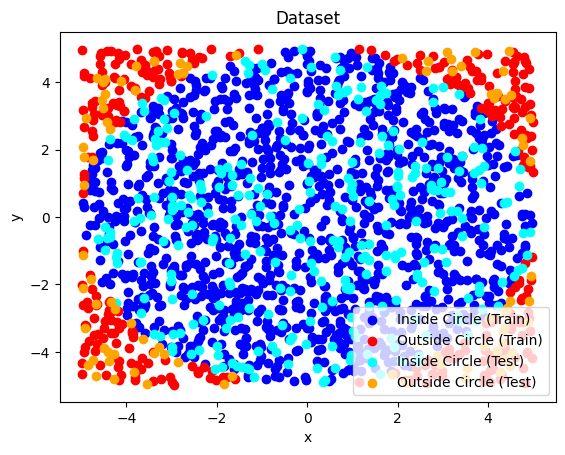

In [37]:
# This is the code that generates the samples - you can ignore it

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the circle parameters
radius = 5
center = (0, 0)

# Generate the dataset
num_samples = 2000

# Generate random x, y points within a square
x = torch.rand(num_samples) * 2 * radius - radius
y = torch.rand(num_samples) * 2 * radius - radius

# Calculate the Euclidean distance from each point to the center
distances = torch.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)

# Assign labels based on whether points are inside or outside the circle
labels = torch.where(distances <= radius, torch.zeros_like(distances), torch.ones_like(distances))

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
labels_train, labels_test = train_test_split(labels, test_size=0.2, random_state=42)

# Plot the training and testing datasets
plt.scatter(x_train[labels_train == 0], y_train[labels_train == 0], color='blue', label='Inside Circle (Train)')
plt.scatter(x_train[labels_train == 1], y_train[labels_train == 1], color='red', label='Outside Circle (Train)')
plt.scatter(x_test[labels_test == 0], y_test[labels_test == 0], color='cyan', label='Inside Circle (Test)')
plt.scatter(x_test[labels_test == 1], y_test[labels_test == 1], color='orange', label='Outside Circle (Test)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.legend()
plt.show()

Create Dataset class which stores samples and their labels.

In [38]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CircleDataset(Dataset):
    def __init__(self, x, y, labels):
        self.x = x
        self.y = y
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    # Each sample will have the coords (2D vector) and a class label (inside or outside the circle)
    def __getitem__(self, idx):
        sample = {
            'coords': torch.tensor([self.x[idx], self.y[idx]]),
            'label': self.labels[idx].long()
        }

        return sample

The Dataset class in PyTorch represents a collection of data samples and labels. It is needed for the DataLoader class.

The DataLoader class efficiently loads and manages the data during training or inference by providing features like batching and shuffling. These classes are commonly used in PyTorch. You can read more about them [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [39]:
train_dataset = CircleDataset(x_train, y_train, labels_train)
test_dataset = CircleDataset(x_test, y_test, labels_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

We will define an evaluation function which calculates the accuracy on the test set. This function will be used in the training loop in order to keep track of the evolution of the model on unseen data.

We compute the accuracy manually for educational purposes. However, this is not necessary. There are already functions for computing evaluation metrics in the sklearn library. You can check them [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). See [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

Additional Note: Notice that when evaluating we do not keep track of gradients. We only want to keep track of gradients when training

In [40]:
def evaluate(model):
  # Put model in evaluation mode
  model.eval()

  # For keeping track of number of correct predictions and total predictions
  correct = 0
  total = 0

  for data in test_loader:
      coords = data['coords'].to(device)
      ground_truth = data['label'].to(device)

      # We do not need to keep track of gradients while testing
      with torch.no_grad():
        pred = model(coords)

      # For each sample the model predicts 2 values - score for inside class and score for outside class
      # We keep the prediction that has the highest score
      _, predicted = torch.max(pred, 1)

      # We count all the predictions which match the ground truth to get number of correct predictions
      correct += (predicted == ground_truth).sum().item()
      total += coords.shape[0]

  accuracy = np.round(100 * correct / total, 2)

  print(f"Test Accuracy: {accuracy}")

The training loop will look very similar to the previous example.

However, now we also iterate through the data loader which returns batches of random samples and their labels.

In [41]:
# Cross Entropy Loss - commonly used for classification
criterion = nn.CrossEntropyLoss()

# Hyperparameters
learning_rate = 0.0005
epochs = 10

# 1. Initialize parameters
model = Net()

# Push model on device
model.to(device)
print(model)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  epoch_loss = 0
  for data in train_loader:
    # Put model in training mode
    model.train()

    coords = data['coords'].to(device)
    ground_truth = data['label'].to(device)
    pred = model(coords)

    # 2. Compute loss
    loss = criterion(pred, ground_truth)

    # 3. Compute gradients
    loss.backward()

    # 4. Update parameters
    optimizer.step()

    # Set gradient to 0 for next computation
    optimizer.zero_grad()

    epoch_loss += loss

  print(f"Epoch: {epoch}, Training loss = {epoch_loss}")
  evaluate(model)


Net(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=2, bias=True)
  (activation): ReLU()
)
Epoch: 0, Training loss = 18.737619400024414
Test Accuracy: 27.25
Epoch: 1, Training loss = 18.572174072265625
Test Accuracy: 30.25
Epoch: 2, Training loss = 18.414506912231445
Test Accuracy: 31.75
Epoch: 3, Training loss = 18.263975143432617
Test Accuracy: 34.5
Epoch: 4, Training loss = 18.120424270629883
Test Accuracy: 37.0
Epoch: 5, Training loss = 17.983551025390625
Test Accuracy: 38.75
Epoch: 6, Training loss = 17.852811813354492
Test Accuracy: 41.0
Epoch: 7, Training loss = 17.728139877319336
Test Accuracy: 41.5
Epoch: 8, Training loss = 17.609094619750977
Test Accuracy: 42.5
Epoch: 9, Training loss = 17.49540138244629
Test Accuracy: 43.5


**Exercise 2** - Play with the hyperparameters (learning rate, number of epochs) and with the structure of the model (add more neurons in the hidden layer, add more layers) and see if you can improve the results. Maybe also change the optimizer.

Try to apply only one change at a time and test it to see what improves the results and what decreases performance.

Do not perform many changes at once as you will not know what caused a change in performance.

#### Neural Network for classification on the Iris Dataset

**Exercise 3** - Train a Neural Network for classification on the iris dataset.

The iris dataset consists of measurements of sepal and petal lengths and widths for three different species of iris flowers: setosa, versicolor, and virginica. See more details about the dataset [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) and [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).

Your input to the model will be all these measurements (features) and you will have 3 flower classes.

This code imports the dataset and creates the dataloaders that you need

In [42]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Plotting the dataset

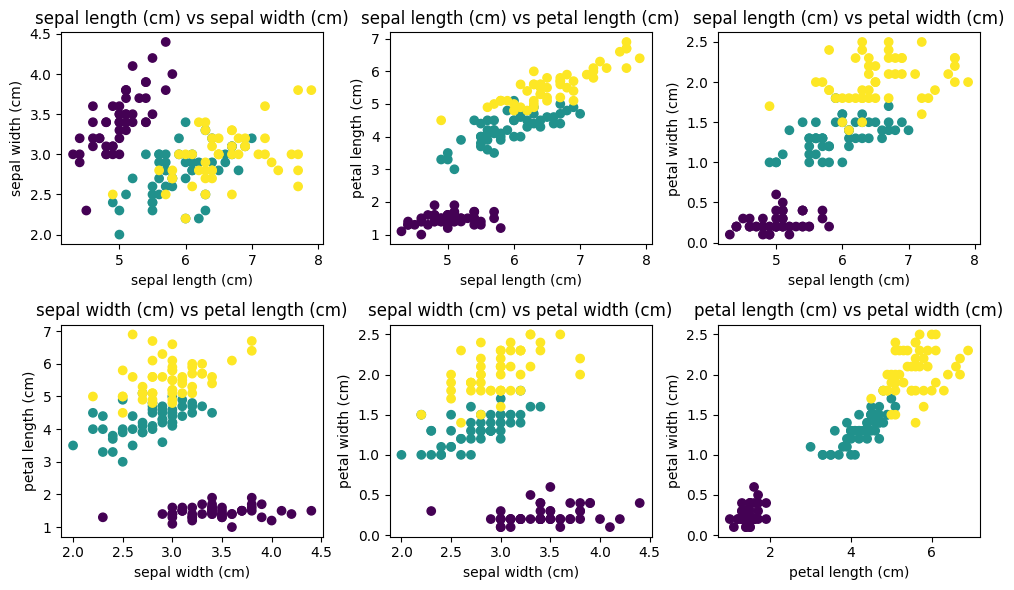

In [43]:
# Create plots for different feature combinations
feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
num_plots = len(feature_combinations)
num_rows = (num_plots + 1) // 3  # Calculate the number of rows required for the subplot grid

# Create the subplot grid
fig, axs = plt.subplots(num_rows, 3, figsize=(10, num_rows * 3))

# Plotting the dataset for each feature combination
for i, (feat_idx1, feat_idx2) in enumerate(feature_combinations):
    row = i // 3  # Determine the row index in the subplot grid
    col = i % 3   # Determine the column index in the subplot grid
    axs[row, col].scatter(data[:, feat_idx1], data[:, feat_idx2], c=labels, cmap='viridis')
    axs[row, col].set_xlabel(feature_names[feat_idx1])
    axs[row, col].set_ylabel(feature_names[feat_idx2])
    axs[row, col].set_title(f"{feature_names[feat_idx1]} vs {feature_names[feat_idx2]}")

plt.tight_layout()
plt.show()


We create the Dataset class

In [44]:
class IrisDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sample = {
            'features': torch.tensor(self.features[idx], dtype=torch.float32),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }
        return sample

We create the dataloaders for training set and testing set

In [45]:
# Create train and test datasets
iris_train_dataset = IrisDataset(x_train, y_train)
iris_test_dataset = IrisDataset(x_test, y_test)

# Create train and test data loaders
iris_train_loader = DataLoader(iris_train_dataset, batch_size=64, shuffle=True)
iris_test_loader = DataLoader(iris_test_dataset, batch_size=64, shuffle=False)

In [46]:
# Check out some samples from the dataset
print(iris_train_dataset[0])
print(iris_train_dataset[50])
print(iris_train_dataset[110])

{'features': tensor([4.6000, 3.6000, 1.0000, 0.2000]), 'label': tensor(0)}
{'features': tensor([6.4000, 2.7000, 5.3000, 1.9000]), 'label': tensor(2)}
{'features': tensor([6.3000, 2.3000, 4.4000, 1.3000]), 'label': tensor(1)}


Your job is to construct the neural network and write the training and evaluation.

Play with the number of hidden layers and their size (number of neurons) to see what configuration is best.

Some things to keep in mind:
- What is the dimensionality of the input? This will tell you the number of input neurons for first layer
- What is the number of classes? This will tell you the number of output neurons for final layer
- When adding multiple hidden layers the in_features (number of neurons) of current layer should match the out_features of the previous layer
- Do not forget about using activation functions after each layer (except output)

In [64]:
class MyNet(nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    # TODO - Write the layers of the network
    self.fc1 = nn.Linear(in_features=4, out_features=4)

    # This defines the connections from hidden layer to output layer - 3 neruons to 2 neurons
    self.fc2 = nn.Linear(in_features=4, out_features=3)

    self.fc3 = nn.Linear(in_features=3, out_features=3)

    self.activation = nn.GELU()

  def forward(self, x):
    # TODO - Write the forward function - pass through each layer - do not forget about activation functions
    x = self.fc1(x)

    # We add nonlinearity
    x = self.activation(x)

    # We pass through output layer
    x = self.fc2(x)

    x = self.activation(x)

    x = self.fc3(x)


    return x

Write the training loop and the evaluation:

* Define the hyperparameters
* Define the loss function (criterion) - You can use already existing ones.
* Define the optimizer
* Initialize the model and train it
* Evaluate the model's accuracy

You can take inspiration from the previous example.

In [68]:
# TODO - Write the training loop and evaluation code on the test set

criterion = nn.CrossEntropyLoss()

# Hyperparameters
learning_rate = 0.0005
epochs = 1700

# 1. Initialize parameters
model = MyNet()

# Push model on device
model.to(device)
print(model)

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  epoch_loss = 0
  for data in iris_train_loader:
    # Put model in training mode
    model.train()

    features = data['features'].to(device)
    ground_truth = data['label'].to(device)
    pred = model(features)

    # 2. Compute loss
    loss = criterion(pred, ground_truth)

    # 3. Compute gradients
    loss.backward()

    # 4. Update parameters
    optimizer.step()

    # Set gradient to 0 for next computation
    optimizer.zero_grad()

    epoch_loss += loss

  print(f"Epoch: {epoch}, Training loss = {epoch_loss}")
  # Need to update the evaluate function to use the iris_test_loader
  def evaluate_iris(model):
    # Put model in evaluation mode
    model.eval()

    # For keeping track of number of correct predictions and total predictions
    correct = 0
    total = 0

    for data in iris_test_loader: # Changed from test_loader to iris_test_loader
        features = data['features'].to(device)
        ground_truth = data['label'].to(device)

        # We do not need to keep track of gradients while testing
        with torch.no_grad():
          pred = model(features)

        # For each sample the model predicts 3 values (for 3 classes) - score for each class
        # We keep the prediction that has the highest score
        _, predicted = torch.max(pred, 1)

        # We count all the predictions which match the ground truth to get number of correct predictions
        correct += (predicted == ground_truth).sum().item()
        total += features.shape[0]

    accuracy = np.round(100 * correct / total, 2)

    print(f"Test Accuracy: {accuracy}")

  evaluate_iris(model) # Changed from evaluate to evaluate_iris

MyNet(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (activation): GELU(approximate='none')
)
Epoch: 0, Training loss = 2.2284631729125977
Test Accuracy: 30.0
Epoch: 1, Training loss = 2.234354257583618
Test Accuracy: 30.0
Epoch: 2, Training loss = 2.2280168533325195
Test Accuracy: 30.0
Epoch: 3, Training loss = 2.2284231185913086
Test Accuracy: 30.0
Epoch: 4, Training loss = 2.2284164428710938
Test Accuracy: 30.0
Epoch: 5, Training loss = 2.223238468170166
Test Accuracy: 30.0
Epoch: 6, Training loss = 2.224815845489502
Test Accuracy: 30.0
Epoch: 7, Training loss = 2.2246880531311035
Test Accuracy: 30.0
Epoch: 8, Training loss = 2.2197272777557373
Test Accuracy: 30.0
Epoch: 9, Training loss = 2.2224488258361816
Test Accuracy: 30.0
Epoch: 10, Training loss = 2.2251522541046143
Test Accuracy: 30.0
Epoch: 11, Training loss = 2.2204997539520264
Test Accuracy: 30